<a href="https://colab.research.google.com/github/bhoomi1312/DCC/blob/main/Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip3 install torchvision
!pip install tensorflow

import matplotlib.pyplot as plt
import numpy as np
import os
import json
from torchvision import datasets, transforms, models
import fnmatch


import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_dir = '/content/drive/MyDrive/REU/PlantVillage'

train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'

with open('/content/drive/MyDrive/REU/Plant-diseases-classifier-master/categories.json', 'r') as f:
    cat_to_name = json.load(f)
  
print([cat_to_name.keys()])

train_dic = {}
val_dic = {}

for folder in cat_to_name.keys():

  dir_path = f'/content/drive/MyDrive/REU/PlantVillage/train/{folder}'
  train_count = len(fnmatch.filter(os.listdir(dir_path), '*.*'))

  dir_path = f'/content/drive/MyDrive/REU/PlantVillage/val/{folder}'
  val_count = len(fnmatch.filter(os.listdir(dir_path), '*.*'))


  print(f'{folder} Count (Train): {train_count}')
  
  train_dic[folder] = train_count

  print(f'{folder} Count (Test) : {val_count}')
  
  val_dic[folder] = val_count
    

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dict_keys(['Potato___Early_blight', 'Potato___healthy', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'])
dict_values([117, 117, 117, 117])


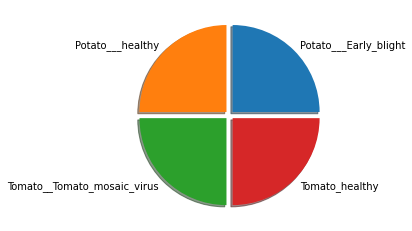

In [ ]:

mylabels = np.array(list(train_dic.keys()))
y = np.array(list(train_dic.values()))
print(train_dic.keys())
print(train_dic.values())
myexplode = [0.05, 0.05, 0.05, 0.05]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

dict_keys(['Potato___Early_blight', 'Potato___healthy', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'])
dict_values([36, 35, 36, 35])


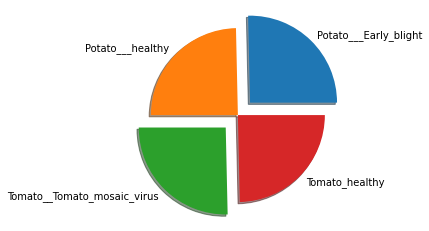

In [ ]:
mylabels = np.array(list(val_dic.keys()))
y = np.array(list(val_dic.values()))
print(val_dic.keys())
print(val_dic.values())
myexplode = [0.2, 0, 0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

Importing Libraries




In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental import preprocessing
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [ ]:
dir = os.listdir('../content/drive/MyDrive/PlantVillage/train')
for filenames in dir:
    print(filenames)

Potato___Early_blight
Tomato_healthy
Tomato__Tomato_mosaic_virus
Potato___healthy


In [ ]:
Current_Dir = os.getcwd()
dataset_dir = pathlib.Path(Current_Dir)
print(dataset_dir)

/content


Init


In [ ]:
Image_Size = 256
Batch_Size = 32
Channels = 3
Epochs = 40

Load the DataSet


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/PlantVillage/train", batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True) 



Found 468 files belonging to 4 classes.


Class Names



In [ ]:

class_name = dataset.class_names
class_name

['Potato___Early_blight',
 'Potato___healthy',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

LengthOfBatches

In [ ]:
len(dataset)

15

In [ ]:
print(dataset) 

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Printing Images from training Sample

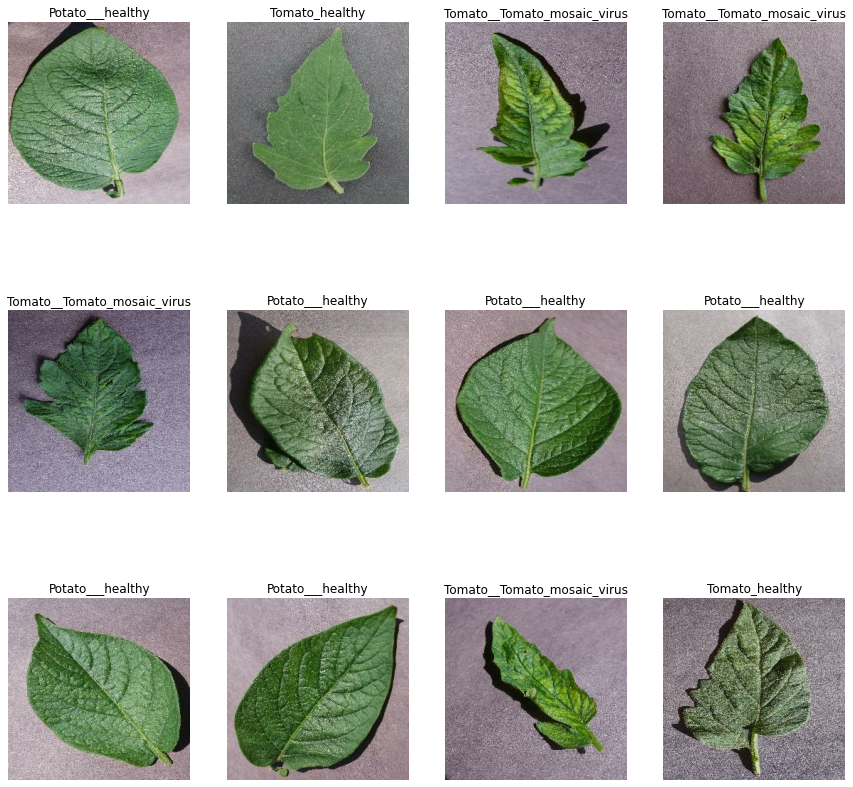

In [ ]:

plt.figure(figsize = (15,15))

for image, label in dataset.take(1): 
    for i in range(12):
        plt.subplot(3, 4, i+1) 
        plt.imshow(image[i].numpy().astype('uint8')) 
        plt.title(class_name[label[i]])  
        plt.axis("off") 
        


Splitting the data


In [ ]:

def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
        
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_data, val_data, test_data = split_dataset(dataset)

In [ ]:
print("Size of Data is :{0} \nBatch size of Training Data is :{1}\nBatch size of Validation Data is :{2} \nBatch size of Testing Data is :{3} " .format(len(dataset), len(train_data), len(val_data), len(test_data)))

Size of Data is :15 
Batch size of Training Data is :12
Batch size of Validation Data is :1 
Batch size of Testing Data is :2 




 caching,shuffle and prefetching the data

In [ ]:

train_ds = train_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

Image Preprocessing - Rescaling and Resizing

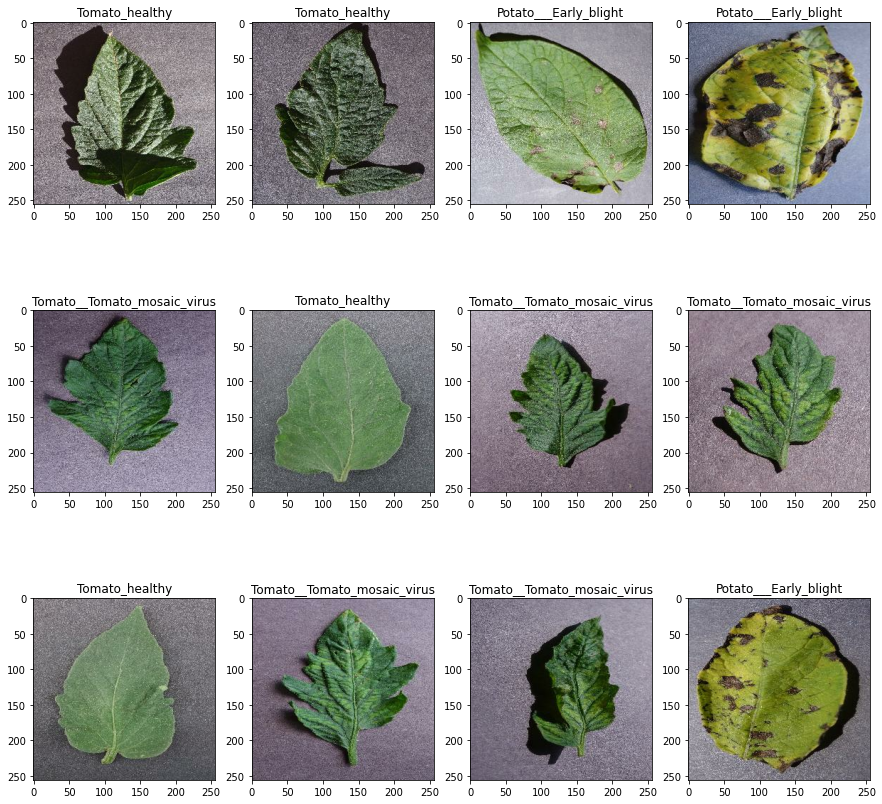

In [ ]:

plt.figure(figsize = (15,15))
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
for image_batch, label_batch in dataset.take(1): 
    for i in range(12):
        plt.subplot(3, 4, i+1) 
        plt.imshow(image[i].numpy().astype('uint8')) 
        plt.title(class_name[label[i]])  
      


 Data augmentation by flipping and rotating existing images

In [87]:

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.5)
])
